[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


===== ORIGINAL TEXT =====
Natural Language Processing (NLP) is a field of Artificial Intelligence.
It helps computers understand human language, translation, and chatbots.
Deep learning and machine learning techniques are widely used in NLP applications.

===== CLEANED TEXT =====
natural language processing nlp field artificial intelligence helps computers understand human language translation chatbots deep learning machine learning techniques widely used nlp applications

===== SENTENCE TOKENS =====
['natural language processing nlp field artificial intelligence helps computers understand human language translation chatbots deep learning machine learning techniques widely used nlp applications']

===== WORD TOKENS =====
['natural', 'language', 'processing', 'nlp', 'field', 'artificial', 'intelligence', 'helps', 'computers', 'understand', 'human', 'language', 'translation', 'chatbots', 'deep', 'learning', 'machine', 'learning', 'techniques', 'widely', 'used', 'nlp', 'applications']

==

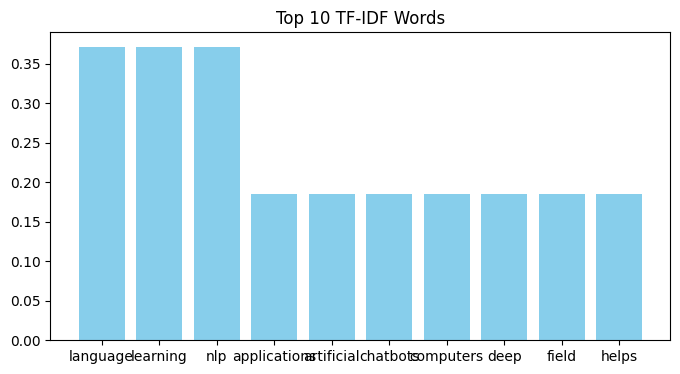

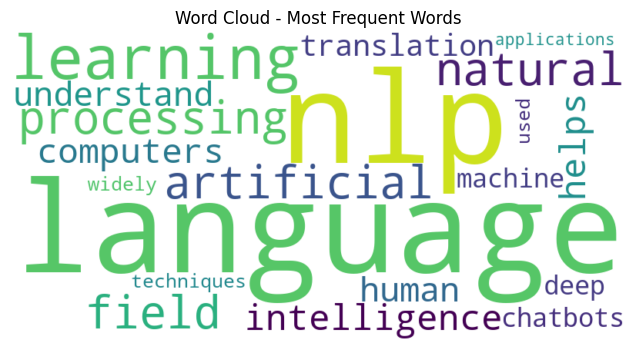


===== Word2Vec Vector for 'language' =====
[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299

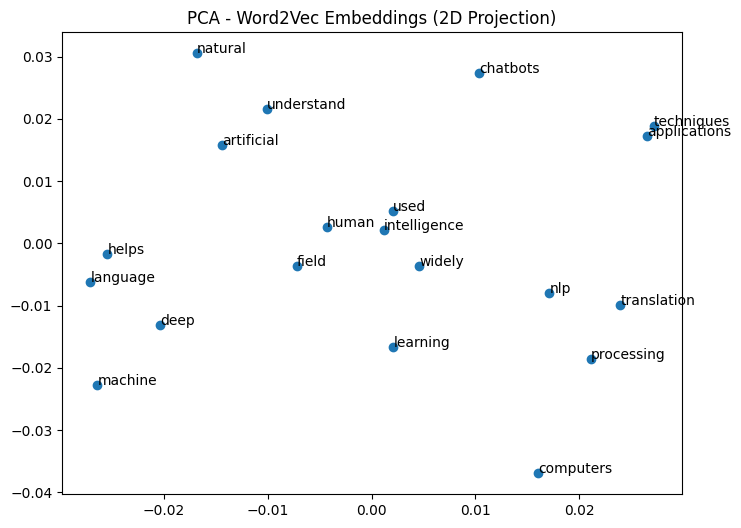


Cosine Similarity between 'language' and 'nlp': -0.0108
Not enough sentences for Jaccard Similarity (need at least 2).
Euclidean Distance between 'language' and 'nlp': 0.0814

⏱ Total Execution Time: 0.0053 seconds


In [4]:
# ==============================
# NLP Lab Internal - Complete Script
# Covers: Preprocessing → Normalization → Vectorization → Embeddings → Similarity
# ==============================

import re
import time
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import spacy
from gensim.models import Word2Vec, FastText

# ------------------------------
# Download required NLTK data
# ------------------------------
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# ------------------------------
# Sample Text (can replace with user input or file text)
# ------------------------------
text = """Natural Language Processing (NLP) is a field of Artificial Intelligence.
It helps computers understand human language, translation, and chatbots.
Deep learning and machine learning techniques are widely used in NLP applications."""

print("===== ORIGINAL TEXT =====")
print(text)

# ==============================
# 1. Text Reading and Preprocessing
# ==============================
# Lowercase
text = text.lower()

# Remove non-alphabetical characters
text = re.sub(r'[^a-z\s]', ' ', text)

# Tokenization
words = word_tokenize(text)

# Remove stopwords and short/long words
stop_words = set(stopwords.words("english"))
cleaned_words = [w for w in words if w not in stop_words and 3 <= len(w) <= 15]
cleaned_text = " ".join(cleaned_words)

print("\n===== CLEANED TEXT =====")
print(cleaned_text)

# Sentence Tokenization
sentences = sent_tokenize(cleaned_text)
print("\n===== SENTENCE TOKENS =====")
print(sentences)

# Word Tokenization
word_tokens = word_tokenize(cleaned_text)
print("\n===== WORD TOKENS =====")
print(word_tokens)

# ==============================
# 2. Text Normalization & Tags
# ==============================
ps = PorterStemmer()
stemmed = [ps.stem(w) for w in word_tokens]

wnl = WordNetLemmatizer()
lemmatized = [wnl.lemmatize(w) for w in word_tokens]

nlp = spacy.load("en_core_web_sm")
doc = nlp(cleaned_text)
spacy_lemmatized = [token.lemma_ for token in doc]

print("\n===== STEMMED WORDS =====")
print(stemmed)
print("\n===== WORDNET LEMMATIZED WORDS =====")
print(lemmatized)
print("\n===== SPACY LEMMATIZED WORDS =====")
print(spacy_lemmatized)

# POS Tags
pos_tags = nltk.pos_tag(word_tokens)
print("\n===== POS TAGS =====")
print(pos_tags[:20])

# Named Entities
print("\n===== NAMED ENTITIES =====")
for ent in doc.ents:
    print(ent.text, "->", ent.label_)

# Dependency Visualization (spaCy)
# spacy.displacy.serve(doc, style="dep")   # Uncomment if browser rendering is allowed

# ==============================
# 3. Vectorization & Visualization
# ==============================
# Count Vectorizer (CBOW)
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform([cleaned_text])
print("\n===== CBOW Vocabulary =====")
print(count_vectorizer.vocabulary_)
print("\n===== CBOW Vectorized Output =====")
print(count_matrix.toarray())

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([cleaned_text])
print("\n===== TF-IDF Vocabulary =====")
print(tfidf_vectorizer.vocabulary_)
print("\n===== TF-IDF Vectorized Output =====")
print(tfidf_matrix.toarray())

# Bar Chart for TF-IDF
words = tfidf_vectorizer.get_feature_names_out()
scores = tfidf_matrix.toarray().flatten()
tfidf_scores = dict(zip(words, scores))
top_words = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:10]
words_top, scores_top = zip(*top_words)

plt.figure(figsize=(8,4))
plt.bar(words_top, scores_top, color="skyblue")
plt.title("Top 10 TF-IDF Words")
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cleaned_text)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Most Frequent Words")
plt.show()

# ==============================
# 4. Word Embeddings & Visualization
# ==============================
# Convert sentences for embeddings training
sentences_split = [word_tokenize(s) for s in sentences]

# Word2Vec (CBOW)
w2v_model = Word2Vec(sentences_split, vector_size=100, window=5, min_count=1, sg=0)
print("\n===== Word2Vec Vector for 'language' =====")
print(w2v_model.wv["language"])
print("\nMost similar to 'language':")
print(w2v_model.wv.most_similar("language"))

# FastText
ft_model = FastText(sentences_split, vector_size=100, window=5, min_count=1)
print("\n===== FastText Vector for 'nlp' =====")
print(ft_model.wv["nlp"])
print("\nMost similar to 'nlp':")
print(ft_model.wv.most_similar("nlp"))

# PCA Visualization
words = list(w2v_model.wv.key_to_index.keys())
vectors = [w2v_model.wv[w] for w in words]
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.title("PCA - Word2Vec Embeddings (2D Projection)")
plt.show()

# ==============================
# 5. Similarity Measures + Time
# ==============================
start_time = time.time()

# Cosine Similarity
word1, word2 = "language", "nlp"
vec1 = w2v_model.wv[word1].reshape(1,-1)
vec2 = w2v_model.wv[word2].reshape(1,-1)
cos_sim = cosine_similarity(vec1, vec2)[0][0]
print(f"\nCosine Similarity between '{word1}' and '{word2}': {cos_sim:.4f}")

# Jaccard Similarity
# Jaccard Similarity between first two sentences (if available)
if len(sentences_split) >= 2:
    set1, set2 = set(sentences_split[0].split()), set(sentences_split[1].split())
    jaccard_sim = len(set1 & set2) / len(set1 | set2)
    print(f"Jaccard Similarity (Sentence 1 & 2): {jaccard_sim:.4f}")
else:
    print("Not enough sentences for Jaccard Similarity (need at least 2).")


# Euclidean Distance
euc_dist = euclidean(w2v_model.wv[word1], w2v_model.wv[word2])
print(f"Euclidean Distance between '{word1}' and '{word2}': {euc_dist:.4f}")

# Execution Time
end_time = time.time()
print(f"\n⏱ Total Execution Time: {end_time - start_time:.4f} seconds")
